# Plot Statics #

#### Preamble ####

In [4]:
import numpy as np
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.linalg import expm

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['legend.fontsize'] = 8

#### Import data ####

##### Mac #####

In [2]:
#### Gibbs ####
dataG_qu = np.array(pd.read_csv(r'../paper_data/qu_Gibbs.csv'))
dataG_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'))

#### prmd ####
data1D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_prmd_150.csv'))
data1D_prmd_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_prmd.csv'))

data3D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prmd_5.csv'))
data3D_prmd_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prmd.csv'))

data_tempo = np.array(pd.read_csv(r'../paper_data/TEMPO.csv'))

#### prmc - Weak ####
data3D_wk = np.array(pd.read_csv(r'../paper_data/WK_analytical_prmc.csv'))
data3D_MFGS_wk = np.array(pd.read_csv(r'../paper_data/WK_MFGS_prmc.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'

##### Windows #####

In [5]:
#### Gibbs ####
dataG_qu = np.array(pd.read_csv(r'../paper_data/qu_Gibbs.csv'))
dataG_cl = np.array(pd.read_csv(r'C:/Users/crh222/ClassicalSpinMFGS/paper_data/cl_Gibbs.csv'))

#### prmd ####
data1D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_prmd_150.csv'))
data1D_prmd_cl = np.array(pd.read_csv(r'C://Users/crh222/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_prmd.csv'))

data3D_prmd = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prmd_5.csv'))
data3D_prmd_cl = np.array(pd.read_csv(r'C:/Users/crh222/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prmd.csv'))

data_tempo = np.array(pd.read_csv(r'../paper_data/TEMPO.csv'))

#### prmc - Weak ####
data3D_wk = np.array(pd.read_csv(r'../paper_data/WK_analytical_prmc.csv'))
data3D_MFGS_wk = np.array(pd.read_csv(r'../paper_data/WK_MFGS_prmc.csv'))

#### sz ####

##### Single- vs. multi-bath ####

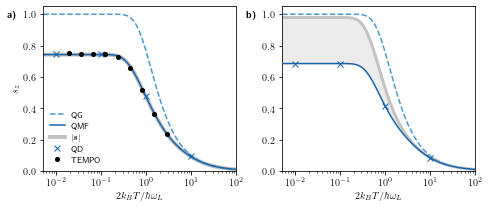

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(6.75, 3))

bcmap = plt.get_cmap('Blues') # Blue colormap
gcmap = plt.get_cmap('Greys') # Grey colormap

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[0].set_ylabel("$s_z$")

for i in [0, 1]:
        ax[i].set_xlim(0.5e-2, 1.0e2)
        ax[i].set_ylim(0.0, 1.05)

##### Data 3D ######
ax[0].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG', zorder=1) # Gibbs
ax[0].semilogx(data3D_prmd[:,0], data3D_prmd[:,3], color=bcmap(0.8), label='QMF', zorder=2) # MFGS

ax[0].semilogx(data3D_prmd[:,0], np.sqrt(data3D_prmd[:,1]**2 + data3D_prmd[:,2]**2 + data3D_prmd[:,3]**2), color=gcmap(0.35), linestyle='-', linewidth=4, zorder=0, label='$|\\bm{s}|$') # MFGS

ax[0].plot(0.01, 0.745, color=bcmap(0.8), marker='x', linestyle='None', label='QD', zorder=3) # Dynamics
ax[0].plot(0.1, 0.745, color=bcmap(0.8), marker='x', linestyle='None', zorder=3) # Dynamics
ax[0].plot(1, 0.476, color=bcmap(0.8), marker='x', linestyle='None', zorder=3) # Dynamics
ax[0].plot(10, 0.0942, color=bcmap(0.8), marker='x', linestyle='None', zorder=3) # Dynamics

ax[0].semilogx(data_tempo[:,0], data_tempo[:,1], 'ko', markersize=4, label='TEMPO', zorder=4) # TEMPO

##### Data 1D ######
ax[1].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', zorder=1) # Gibbs
ax[1].semilogx(data1D_prmd[:,0], data1D_prmd[:,3], color=bcmap(0.8), zorder=3) # MFGS

ax[1].plot(0.01, 0.685, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(0.1, 0.685, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(1, 0.417, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics
ax[1].plot(10, 0.086, color=bcmap(0.8), marker='x', linestyle='None', zorder=4) # Dynamics

ax[1].fill_between(data1D_prmd[:,0], np.sqrt(data1D_prmd[:,1]**2 + data1D_prmd[:,2]**2 + data1D_prmd[:,3]**2), data1D_prmd[:,3], color=gcmap(0.15), zorder=0)

ax[1].semilogx(data1D_prmd[:,0], np.sqrt(data1D_prmd[:,1]**2 + data1D_prmd[:,2]**2 + data1D_prmd[:,3]**2), color=gcmap(0.35), linestyle='-', linewidth=3, zorder=2) # MFGS

ax[0].text(0.08e-2, 0.98, '\\textbf{a)}')
ax[1].text(0.08e-2, 0.98, '\\textbf{b)}')

ax[0].legend(ncol=1, loc='lower left', frameon=False, handlelength=1.8)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/charlie/multibath/paper/graphs/sz_T_prmd_1D_3D.pdf', dpi=300) # Export for Mac
# plt.savefig('C:/Users/crh222/Dropbox/charlie/multi_bath/paper/graphs/sz_T_prmd_1D_3D.pdf', dpi=300) # Export for Windows

##### Quantum vs. classical ####

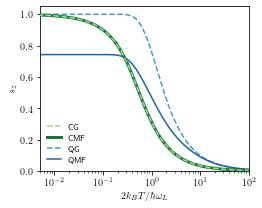

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3.75, 3))

bcmap = plt.get_cmap('Blues') # Blue colormap
ocmap = plt.get_cmap('YlGn') # Green colormap

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$s_z$")

ax.set_xlim(0.5e-2, 1.0e2)
ax.set_ylim(0.0, 1.05)

def clGibbs(T): # Analytical classical Gibbs state
    return(1/np.tanh(1/T) - T)

##### Classical ######
# ax.semilogx(dataG_qu[:,0], clGibbs(dataG_qu[:,0]), 'r-') # Gibbs (Analytical)
ax.semilogx(dataG_cl[:,0], dataG_cl[:,3], color=ocmap(0.4), linestyle='--', zorder=4, label='CG') # Gibbs (Numerical)
ax.semilogx(data3D_prmd_cl[:,0], data3D_prmd_cl[:,3], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=3, label='CMF') # MFGS

##### Quantum ######
ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG', zorder=0) # Gibbs
ax.semilogx(data3D_prmd[:,0], data3D_prmd[:,3], color=bcmap(0.8), label='QMF', zorder=1) # MFGS

ax.legend(ncol=1, loc='lower left', frameon=False, handlelength=1.8)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/charlie/multi_bath/paper/graphs/sz_T_prmd_qu_cl.pdf', dpi=300) # Export for Mac
# plt.savefig('C:/Users/crh222/Dropbox/charlie/multi_bath/paper/graphs/sz_T_prmd_qu_cl.pdf', dpi=300) # Export for Windows

#### sx and sy ####

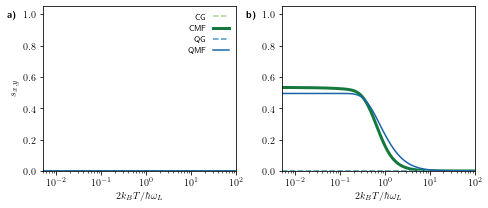

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(6.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
gcmap = plt.get_cmap('Greys')

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[0].set_ylabel("$s_{x,y}$")

for i in [0, 1]:
        ax[i].set_xlim(0.5e-2, 1.0e2)
        ax[i].set_ylim(0.0, 1.05)

##### Data 3D ######

## Classical ##
ax[0].semilogx(dataG_cl[:,0], dataG_cl[:,1], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
ax[0].semilogx(data3D_prmd_cl[:,0], data3D_prmd_cl[:,1], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=1, label='CMF') # MFGS

## Quantum ##
ax[0].semilogx(dataG_qu[:,0], dataG_qu[:,1], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
ax[0].semilogx(data3D_prmd[:,0], data3D_prmd[:,1], color=bcmap(0.8), label='QMF') # MFGS

##### Data 1D ######

## Classical ##
ax[1].semilogx(dataG_cl[:,0], dataG_cl[:,1], color=ocmap(0.4), linestyle='--', zorder=2, label='CG') # Gibbs (Numerical)
ax[1].semilogx(data1D_prmd_cl[:,0], data1D_prmd_cl[:,1], color=ocmap(0.8), linestyle='-', linewidth=3, zorder=0) # MFGS

## Quantum ##
ax[1].semilogx(dataG_qu[:,0], dataG_qu[:,1], color=bcmap(0.6), linestyle='--') # Gibbs
ax[1].semilogx(data1D_prmd[:,0], data1D_prmd[:,1], color=bcmap(0.8)) # MFGS

ax[0].text(0.08e-2, 0.98, '\\textbf{a)}')
ax[1].text(0.08e-2, 0.98, '\\textbf{b)}')

ax[0].legend(ncol=1, loc='upper right', frameon=False, markerfirst=False)

fig.tight_layout(w_pad = 1.4)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/sxy_T_prmd_1D_3D.pdf', dpi=300) # Export for Mac
# plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project///Paper//Graphs//sxy_T_prmd_1D_3D.pdf', dpi=300) # Export for Windows

#### Weak ####

C:\Users\crh222\AppData\Local\Temp\ipykernel_1592\1622560163.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad = 0.5)


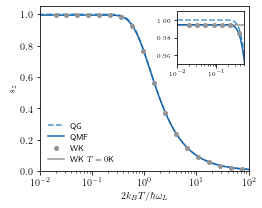

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(3.75, 3))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')
rcmap = plt.get_cmap('Greys')

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$s_z$")

ax.set_xlim(1.0e-2, 1.0e2)
ax.set_ylim(0.0, 1.05)

##### Weak ######

ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='QG') # Gibbs
ax.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,1], color=bcmap(0.8), label='QMF') # MFGS
ax.semilogx(2*data3D_wk[:,0], data3D_wk[:,1], 'o', markersize=4, label='WK', color=rcmap(0.5)) # Weak Approximation

axins0 = inset_axes(ax, width="32%", height="32%", loc=1, borderpad=0.6)
axins0.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--')
axins0.axhline(0.9944940859343847, color=rcmap(0.5), label='WK $T=0$K')
axins0.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,1], color=bcmap(0.8))
axins0.semilogx(2*data3D_wk[:,0], data3D_wk[:,1], 'o', markersize=4, color=rcmap(0.5))

axins0.tick_params(labelsize=6)

axins0.set_xlim(1.0e-2, 0.5)
axins0.set_ylim(0.95, 1.01)

fig.legend(ncol=1, loc=(0.17, 0.2), frameon=False)

fig.tight_layout(w_pad = 0.5)

# plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Paper/Graphs/wk.pdf', dpi=300) # Export for Mac
plt.savefig('C://Users/crh222/Dropbox/PhD/1. 3D Project/Paper/Graphs/wk.pdf', dpi=300) # Export for Windows